In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections

In [96]:
def withStar(string):
  if string=='':
    return '';
  else:
    return '**'+string[:]+'**'

In [97]:
def grams(string,num)->list[str]:
    string=withStar(string)
    begin=len(string)-num;
    token=[];
    for i in range(begin+1):
        a=[];
        a=string[i:i+3]
        token.append(a);
    return token;

In [98]:
def overlap(string1,string2)->int:
    s1=grams(string1,3);
    s2=grams(string2,3);
    common_elements = list(set(s1).intersection(set(s2)));
    lc=len(common_elements);
    m=min(len(s1),len(s2));
    if m==0: 
        return 0;
    else:
        sim1=lc/m;
        return sim1;

In [99]:
def jaccard(string1,string2):
    s1=grams(string1,3);
    s2=grams(string2,3);
    common_elements = list(set(s1).intersection(set(s2)));
    lc=len(common_elements);
    union_elements=list(set(s1).union(set(s2)));
    lu=len(union_elements);
    if lu==0:
        return 0;
    else:
        sim2 = lc/lu;
        return sim2;

In [100]:
def dice(string1,string2):
    s1=grams(string1,3);
    s2=grams(string2,3);
    common_elements = list(set(s1).intersection(set(s2)));
    lc=len(common_elements);
    if len(s1)+len(s2)==0:
        return 0;
    else:
        sim3=2*lc/(len(s1)+len(s2));
        return sim3;

In [101]:
QQP_train = pd.read_csv("QQP_train.tsv", sep="\t")
QQP_train

,id,qid1,qid2,question1,question2,is_duplicate
0,133273,213221,213222,How is the life of a math student? Could you d...,Which level of prepration is enough for the ex...,0
1,402555,536040,536041,How do I control my horny emotions?,How do you control your horniness?,1
2,360472,364011,490273,What causes stool color to change to yellow?,What can cause stool to come out as little balls?,0
3,150662,155721,7256,What can one do after MBBS?,What do i do after my MBBS ?,1
4,183004,279958,279959,Where can I find a power outlet for my laptop ...,"Would a second airport in Sydney, Australia be...",0
5,119056,193387,193388,How not to feel guilty since I am Muslim and I...,"I don't beleive I am bulimic, but I force thro...",0
6,356863,422862,96457,How is air traffic controlled?,How do you become an air traffic controller?,0
7,106969,147570,787,What is the best self help book you have read?...,What are the top self help books I should read?,1
8,196763,297539,297540,Can I enter University of Melbourne if I could...,University of the Philippines: If I take a sec...,0


In [102]:
question1=QQP_train['question1']
question2=QQP_train['question2']
mark=QQP_train['is_duplicate']

In [103]:
# #data processing
# question1_token=[]
# question2_token=[]
# for i in range(len(question1)):
#     question1_token.append(grams(question1[i],3))
# for i in range(len(question2)):
#     question2_token.append(grams(question2[i],3))

In [104]:
#calculate the overlap coefficient
overlap_coefficient=[]
for i in range(len(question1)):
    overlap_coefficient.append(overlap(question1[i],question2[i]))

In [105]:
#get the equal coefficient
equal_overlap=[]
for i in range(len(overlap_coefficient)):
    if mark[i]==1:
        equal_overlap.append(overlap_coefficient[i])
#         print("The two sentence is equal, overlap coefficient is:",overlap_coefficient[i])
#         print(question1[i])
#         print(question2[i])
#         print('-'*50)

In [106]:
#get the equal coefficient
inequal_overlap=[]
for i in range(len(overlap_coefficient)):
    if mark[i]==0:
        inequal_overlap.append(overlap_coefficient[i])
#         print("The two sentence is not equal, overlap coefficient is:",overlap_coefficient[i])
#         print(question1[i])
#         print(question2[i])
#         print('-'*50)

In [107]:
equal_overlap

[0.5277777777777778, 0.5862068965517241, 0.5306122448979592]

In [108]:
inequal_overlap

[0.15789473684210525,
 0.43478260869565216,
 0.2608695652173913,
 0.32954545454545453,
 0.78125,
 0.2882882882882883]

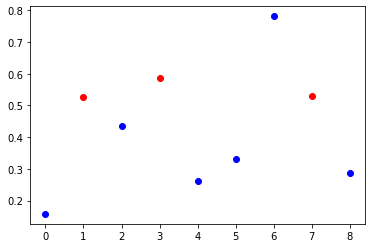

In [109]:
for i in range(len(overlap_coefficient)):
    if overlap_coefficient[i] in equal_overlap:
        plt.scatter(i,overlap_coefficient[i],color='r')
    else:
        plt.scatter(i,overlap_coefficient[i],color='b')
##thershold 0.5

In [110]:
# x=np.linspace(0,1,len(inequal_overlap))
# plt.plot(x,inequal_overlap)

In [111]:
#calculate the jaccard coefficient
jaccard_coefficient=[]
for i in range(len(question1)):
    jaccard_coefficient.append(jaccard(question1[i],question2[i]))

In [112]:
#get the equal coefficient
equal_jaccard=[]
for i in range(len(jaccard_coefficient)):
    if mark[i]==1:
        equal_jaccard.append(jaccard_coefficient[i])
#         print("The two sentence is equal, overlap coefficient is:",jaccard_coefficient[i])
#         print(question1[i])
#         print(question2[i])
#         print('-'*50)

In [113]:
#get the inequal coefficient
inequal_jaccard=[]
for i in range(len(jaccard_coefficient)):
    if mark[i]==0:
        inequal_jaccard.append(jaccard_coefficient[i])
#         print("The two sentence is not equal, overlap coefficient is:",jaccard_coefficient[i])
#         print(question1[i])
#         print(question2[i])
#         print('-'*50)

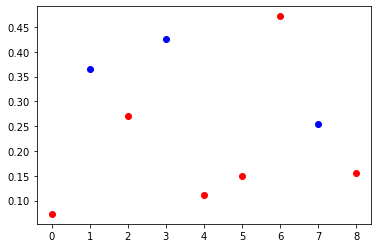

In [114]:
for i in range(len(jaccard_coefficient)):
    if jaccard_coefficient[i] in inequal_jaccard:
        plt.scatter(i,jaccard_coefficient[i],color='r')
    else:
        plt.scatter(i,jaccard_coefficient[i],color='b')
# worse than overlap coeffient

In [115]:
#calculate the dice's coefficient
dice_coefficient=[]
for i in range(len(question1)):
    dice_coefficient.append(dice(question1[i],question2[i]))

In [116]:
#get the equal coefficient
equal_dice=[]
for i in range(len(dice_coefficient)):
    if mark[i]==1:
        equal_dice.append(dice_coefficient[i])
#         print("The two sentence is equal, overlap coefficient is:",dice_coefficient[i])
#         print(question1[i])
#         print(question2[i])
#         print('-'*50)

In [117]:
#get the inequal coefficient
inequal_dice=[]
for i in range(len(dice_coefficient)):
    if mark[i]==0:
        inequal_dice.append(dice_coefficient[i])
#         print("The two sentence is not equal, overlap coefficient is:",dice_coefficient[i])
#         print(question1[i])
#         print(question2[i])
#         print('-'*50)

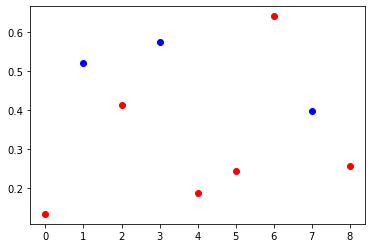

In [118]:
for i in range(len(dice_coefficient)):
    if dice_coefficient[i] in inequal_dice:
        plt.scatter(i,dice_coefficient[i],color='r')
    else:
        plt.scatter(i,dice_coefficient[i],color='b')

In [119]:
# use equal weight in each coefficient
coefficient=[]
for i in range(len(mark)):
    coefficient.append(overlap_coefficient[i]/3+jaccard_coefficient[i]/3+dice_coefficient[i]/3)

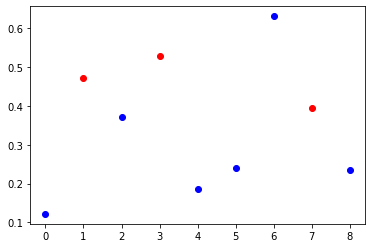

In [120]:
for i in range(len(coefficient)):
    if mark[i]==1:
        plt.scatter(i,coefficient[i],color='r')
    else:
        plt.scatter(i,coefficient[i],color='b')
# same as overlap coefficient

In [121]:
coefficient
#thershold 0.38

[0.1217979422527925,
 0.47123677945595754,
 0.3724746709955137,
 0.5291593609974674,
 0.18649355877616747,
 0.2409963805533426,
 0.6313245847443961,
 0.39415359018925633,
 0.23415012179764344]

In [122]:
QQP_test = pd.read_csv("QQP_dev.tsv", sep="\t")

In [123]:
QQP_test

,id,qid1,qid2,question1,question2,is_duplicate
0,201359,303345,303346,Why are African-Americans so beautiful?,Why are hispanics so beautiful?,0
1,263843,69383,380476,I want to pursue PhD in Computer Science about...,I handle social media for a non-profit. Should...,0
2,172974,266948,175089,Is there a reason why we should travel alone?,What are some reasons to travel alone?,1
3,15329,29298,29299,Why are people so obsessed with having a girlf...,How can a single male have a child?,0
4,209794,314169,314170,What are some good baby girl names starting wi...,What are some good baby girl names starting wi...,0
5,323679,449673,311332,I am 25 year old guy and never had a girlfrien...,I am 25 years old. I have never had a girlfrie...,1
6,144933,10927,229257,What does a good answer on Quora look like? Wh...,How do you write a good answer on Quora?,1
7,198597,299859,299860,What are the best things to do in Hong Kong?,What is the best thing in Hong Kong?,1
8,382732,443182,514615,Why is my life getting so complicated?,Why is my life so complicated?,0


In [124]:
question1_test=QQP_test['question1']
question2_test=QQP_test['question2']
mark_test=QQP_test['is_duplicate']

In [125]:
test_overlap=[]
test_jaccard=[]
test_dice=[]
for i in range(len(question1_test)):
    test_overlap.append(overlap(question1_test[i],question2_test[i]))
    test_jaccard.append(jaccard(question1_test[i],question2_test[i]))
    test_dice.append(dice(question1_test[i],question2_test[i]))

In [126]:
#calculate the coefficient
coefficient_test=[]
for i in range(len(question1_test)):
    coefficient_test.append(overlap(question1_test[i],question2_test[i])/3+jaccard(question1_test[i],question2_test[i])/3+dice(question1_test[i],question2_test[i])/3)

In [127]:
#     coefficient_test.append(overlap(question1_test[i],question2_test[i])/3+jaccard(question1_test[i],question2_test[i])/3+dice(question1_test[i],question2_test[i])/3)

In [128]:
def calculate_is_duplicate(coefficient):
    mark=[]
    for i in range(len(coefficient)):
        if coefficient[i] >= 0.38:
            mark.append(1)
        else:
            mark.append(0)
    return mark

In [129]:
mark_calculate=calculate_is_duplicate(coefficient_test)
mark_calculate

[1, 0, 1, 0, 1, 1, 1, 1, 1]

In [130]:
def acc(mark_real,mark_test):
    sum = 0
    for i in range(len(mark_real)):
        if mark_real[i]==mark_test[i]:
            sum=sum+1
        else:
            continue
    return sum/len(mark_test)

In [131]:
acc(mark_test,mark_calculate)

0.6666666666666666

In [132]:
# use a classifier to predict the result
X_train=[]
X_test=[]
for i in range(len(question1)):
    co=(overlap_coefficient[i], jaccard_coefficient[i], dice_coefficient[i])
    X_train.append(co)
y_train=mark
for i in range(len(question1_test)):
    co=(test_overlap[i], test_jaccard[i], test_dice[i])
    X_test.append(co)
y_test=mark_test

In [134]:
#use KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
model=knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print("Test set predictions:\n{}".format(y_pred))
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set predictions:
[0 0 1 0 0 1 1 0 0]
Test set score: 0.89
Test set score: 0.89
